# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

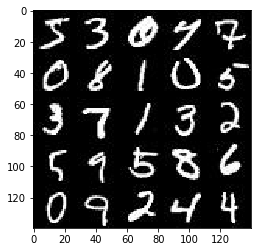

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

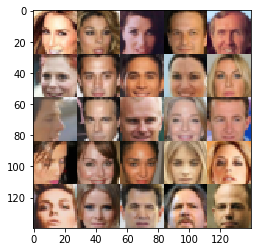

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


C:\Users\Soorya\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    input_real = tf.placeholder(tf.float32, shape=[None, image_width, image_height, image_channels], name='input_real')
    input_z = tf.placeholder(tf.float32, shape=[None, z_dim], name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.1
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # convolutional layer 1
        conv_layer1 = tf.layers.conv2d(images, 56, 5, 2, 'SAME')
        conv_layer1 = tf.maximum(alpha*conv_layer1, conv_layer1)
        
        # convolutional layer 2 and use the layer 1
        conv_layer2 = tf.layers.conv2d(conv_layer1, 112, 5, 2, 'SAME')
        conv_layer2 = tf.layers.batch_normalization(conv_layer2, training=True)
        conv_layer2 = tf.maximum(alpha*conv_layer2, conv_layer2)
        
        # convolutional layer 3 and use the previous layer
        conv_layer3 = tf.layers.conv2d(conv_layer2, 224, 5, 2, 'SAME')
        conv_layer3 = tf.layers.batch_normalization(conv_layer3, training=True)
        conv_layer3 = tf.maximum(alpha*conv_layer3, conv_layer3)
        
        # Output layer to form logits
        flat   = tf.reshape(conv_layer3, (-1, 4*4*224))
        logits = tf.layers.dense(flat, 1)
        
        logits = tf.layers.dropout(logits, rate=0.5)
        
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.1
    
    with tf.variable_scope('generator', reuse=not(is_train)):
        
        # Input fully connected layer
        fully_conn = tf.layers.dense(z, 7*7*112)
        fully_conn = tf.reshape(fully_conn, (-1, 7, 7, 112))
        fully_conn = tf.layers.batch_normalization(fully_conn, training=is_train)
        fully_conn = tf.maximum(alpha*fully_conn, fully_conn)
        
        # Deconvolutional layer
        deconv1 = tf.layers.conv2d_transpose(fully_conn, 56, 5, 2, 'SAME')
        deconv1 = tf.layers.batch_normalization(deconv1, training=is_train)
        deconv1 = tf.maximum(alpha*deconv1, deconv1)
        
        # Output convolutional layer
        output = tf.layers.conv2d_transpose(deconv1, out_channel_dim, 5, 2, 'SAME')
        out = tf.tanh(output)

    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    # Discriminator models & loss
    d_model_real, d_logits_real = discriminator(input_real)
    disc_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)* 0.9))
    
    # Generator model
    g_model = generator(input_z, out_channel_dim)
    d_model_fake, d_logits_fake = discriminator(g_model, True)
    disc_loss_fake=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    # Discriminator loss
    disc_loss = disc_loss_real + disc_loss_fake
    
    # Generator loss
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))  
    return disc_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    steps = 0
    print_every = 10
    show_every = 100

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images = batch_images*2
                
                # Get input noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
            
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval(feed_dict={input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval(feed_dict={input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Step {}...".format(steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, batch_size, input_z, data_shape[3], data_image_mode)                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Step 10... Discriminator Loss: 0.4954... Generator Loss: 2.1706
Epoch 1/2... Step 20... Discriminator Loss: 0.8988... Generator Loss: 1.1343
Epoch 1/2... Step 30... Discriminator Loss: 0.6560... Generator Loss: 4.1862
Epoch 1/2... Step 40... Discriminator Loss: 0.5083... Generator Loss: 3.3201
Epoch 1/2... Step 50... Discriminator Loss: 0.5351... Generator Loss: 2.1258
Epoch 1/2... Step 60... Discriminator Loss: 1.3219... Generator Loss: 5.8874
Epoch 1/2... Step 70... Discriminator Loss: 0.8028... Generator Loss: 1.2628
Epoch 1/2... Step 80... Discriminator Loss: 0.6690... Generator Loss: 1.6754
Epoch 1/2... Step 90... Discriminator Loss: 0.5326... Generator Loss: 2.3721
Epoch 1/2... Step 100... Discriminator Loss: 0.5647... Generator Loss: 1.8885


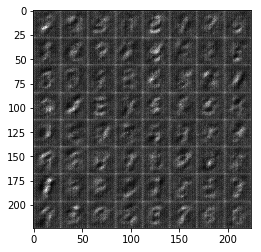

Epoch 1/2... Step 110... Discriminator Loss: 0.5716... Generator Loss: 1.7880
Epoch 1/2... Step 120... Discriminator Loss: 0.5258... Generator Loss: 2.0848
Epoch 1/2... Step 130... Discriminator Loss: 0.6103... Generator Loss: 2.4726
Epoch 1/2... Step 140... Discriminator Loss: 0.5359... Generator Loss: 2.1891
Epoch 1/2... Step 150... Discriminator Loss: 0.6347... Generator Loss: 1.5730
Epoch 1/2... Step 160... Discriminator Loss: 0.5793... Generator Loss: 2.1103
Epoch 1/2... Step 170... Discriminator Loss: 0.5445... Generator Loss: 2.6657
Epoch 1/2... Step 180... Discriminator Loss: 1.0457... Generator Loss: 4.0321
Epoch 1/2... Step 190... Discriminator Loss: 0.5842... Generator Loss: 2.5179
Epoch 1/2... Step 200... Discriminator Loss: 0.9444... Generator Loss: 4.2954


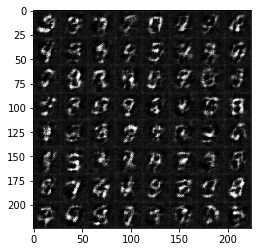

Epoch 1/2... Step 210... Discriminator Loss: 0.5803... Generator Loss: 3.1047
Epoch 1/2... Step 220... Discriminator Loss: 0.7756... Generator Loss: 1.3039
Epoch 1/2... Step 230... Discriminator Loss: 0.5983... Generator Loss: 2.0617
Epoch 1/2... Step 240... Discriminator Loss: 0.5743... Generator Loss: 2.6328
Epoch 1/2... Step 250... Discriminator Loss: 0.4733... Generator Loss: 2.4754
Epoch 1/2... Step 260... Discriminator Loss: 0.4847... Generator Loss: 2.7294
Epoch 1/2... Step 270... Discriminator Loss: 0.9309... Generator Loss: 1.3829
Epoch 1/2... Step 280... Discriminator Loss: 0.5450... Generator Loss: 2.0551
Epoch 1/2... Step 290... Discriminator Loss: 0.7341... Generator Loss: 1.2529
Epoch 1/2... Step 300... Discriminator Loss: 0.4678... Generator Loss: 2.9111


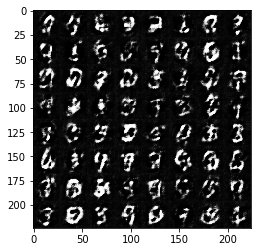

Epoch 1/2... Step 310... Discriminator Loss: 0.5788... Generator Loss: 1.7476
Epoch 1/2... Step 320... Discriminator Loss: 0.5566... Generator Loss: 2.1241
Epoch 1/2... Step 330... Discriminator Loss: 0.4475... Generator Loss: 2.9403
Epoch 1/2... Step 340... Discriminator Loss: 0.4788... Generator Loss: 2.8175
Epoch 1/2... Step 350... Discriminator Loss: 0.4740... Generator Loss: 3.1472
Epoch 1/2... Step 360... Discriminator Loss: 0.4960... Generator Loss: 2.6547
Epoch 1/2... Step 370... Discriminator Loss: 0.4496... Generator Loss: 2.6540
Epoch 1/2... Step 380... Discriminator Loss: 0.4884... Generator Loss: 2.3152
Epoch 1/2... Step 390... Discriminator Loss: 0.4823... Generator Loss: 2.5735
Epoch 1/2... Step 400... Discriminator Loss: 0.9951... Generator Loss: 0.9453


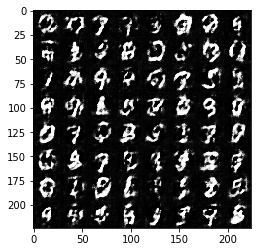

Epoch 1/2... Step 410... Discriminator Loss: 0.4811... Generator Loss: 2.7286
Epoch 1/2... Step 420... Discriminator Loss: 0.4915... Generator Loss: 3.0319
Epoch 1/2... Step 430... Discriminator Loss: 0.4827... Generator Loss: 2.4075
Epoch 1/2... Step 440... Discriminator Loss: 0.4341... Generator Loss: 2.8492
Epoch 1/2... Step 450... Discriminator Loss: 0.4215... Generator Loss: 3.0885
Epoch 1/2... Step 460... Discriminator Loss: 0.4306... Generator Loss: 2.8152
Epoch 1/2... Step 470... Discriminator Loss: 0.5595... Generator Loss: 2.0250
Epoch 1/2... Step 480... Discriminator Loss: 0.5011... Generator Loss: 2.3386
Epoch 1/2... Step 490... Discriminator Loss: 0.5542... Generator Loss: 3.1346
Epoch 1/2... Step 500... Discriminator Loss: 0.5267... Generator Loss: 2.1176


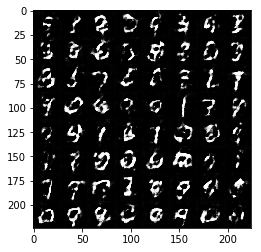

Epoch 1/2... Step 510... Discriminator Loss: 0.6230... Generator Loss: 1.7384
Epoch 1/2... Step 520... Discriminator Loss: 0.5386... Generator Loss: 2.0483
Epoch 1/2... Step 530... Discriminator Loss: 0.4939... Generator Loss: 3.3280
Epoch 1/2... Step 540... Discriminator Loss: 0.4655... Generator Loss: 2.5664
Epoch 1/2... Step 550... Discriminator Loss: 0.4830... Generator Loss: 3.5622
Epoch 1/2... Step 560... Discriminator Loss: 0.5796... Generator Loss: 2.1188
Epoch 1/2... Step 570... Discriminator Loss: 0.5908... Generator Loss: 1.7400
Epoch 1/2... Step 580... Discriminator Loss: 0.4669... Generator Loss: 2.4309
Epoch 1/2... Step 590... Discriminator Loss: 0.4909... Generator Loss: 2.3278
Epoch 1/2... Step 600... Discriminator Loss: 0.4561... Generator Loss: 3.0920


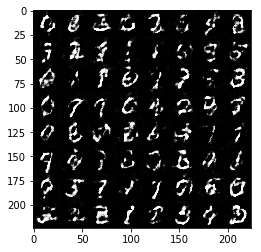

Epoch 1/2... Step 610... Discriminator Loss: 0.4765... Generator Loss: 2.9831
Epoch 1/2... Step 620... Discriminator Loss: 0.8709... Generator Loss: 4.0575
Epoch 1/2... Step 630... Discriminator Loss: 0.7175... Generator Loss: 1.4474
Epoch 1/2... Step 640... Discriminator Loss: 0.5659... Generator Loss: 2.0878
Epoch 1/2... Step 650... Discriminator Loss: 1.3574... Generator Loss: 4.9881
Epoch 1/2... Step 660... Discriminator Loss: 0.6123... Generator Loss: 1.7216
Epoch 1/2... Step 670... Discriminator Loss: 0.5159... Generator Loss: 2.2675
Epoch 1/2... Step 680... Discriminator Loss: 0.9365... Generator Loss: 1.0207
Epoch 1/2... Step 690... Discriminator Loss: 0.6414... Generator Loss: 3.3570
Epoch 1/2... Step 700... Discriminator Loss: 0.5937... Generator Loss: 1.8534


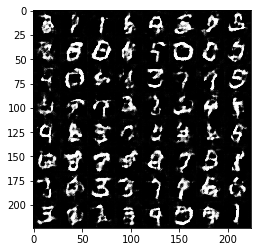

Epoch 1/2... Step 710... Discriminator Loss: 1.5422... Generator Loss: 0.6382
Epoch 1/2... Step 720... Discriminator Loss: 0.5205... Generator Loss: 2.5779
Epoch 1/2... Step 730... Discriminator Loss: 0.5478... Generator Loss: 2.5864
Epoch 1/2... Step 740... Discriminator Loss: 0.4880... Generator Loss: 2.7428
Epoch 1/2... Step 750... Discriminator Loss: 0.5332... Generator Loss: 2.1726
Epoch 1/2... Step 760... Discriminator Loss: 0.5135... Generator Loss: 2.2325
Epoch 1/2... Step 770... Discriminator Loss: 0.5792... Generator Loss: 1.9707
Epoch 1/2... Step 780... Discriminator Loss: 0.6094... Generator Loss: 2.1428
Epoch 1/2... Step 790... Discriminator Loss: 0.5773... Generator Loss: 1.7624
Epoch 1/2... Step 800... Discriminator Loss: 0.6591... Generator Loss: 1.4896


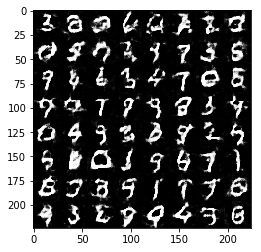

Epoch 1/2... Step 810... Discriminator Loss: 0.5546... Generator Loss: 1.9357
Epoch 1/2... Step 820... Discriminator Loss: 0.5360... Generator Loss: 1.9604
Epoch 1/2... Step 830... Discriminator Loss: 0.4623... Generator Loss: 2.6419
Epoch 1/2... Step 840... Discriminator Loss: 0.4994... Generator Loss: 2.1644
Epoch 1/2... Step 850... Discriminator Loss: 0.5000... Generator Loss: 3.2057
Epoch 1/2... Step 860... Discriminator Loss: 1.5987... Generator Loss: 0.6821
Epoch 1/2... Step 870... Discriminator Loss: 0.6367... Generator Loss: 1.9712
Epoch 1/2... Step 880... Discriminator Loss: 0.6080... Generator Loss: 1.6558
Epoch 1/2... Step 890... Discriminator Loss: 0.5636... Generator Loss: 2.3832
Epoch 1/2... Step 900... Discriminator Loss: 0.5500... Generator Loss: 1.9415


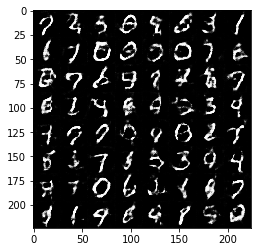

Epoch 1/2... Step 910... Discriminator Loss: 0.6474... Generator Loss: 1.5815
Epoch 1/2... Step 920... Discriminator Loss: 0.5568... Generator Loss: 1.9010
Epoch 1/2... Step 930... Discriminator Loss: 0.8058... Generator Loss: 1.1859
Epoch 2/2... Step 940... Discriminator Loss: 0.5734... Generator Loss: 1.9414
Epoch 2/2... Step 950... Discriminator Loss: 0.4907... Generator Loss: 2.5234
Epoch 2/2... Step 960... Discriminator Loss: 0.5437... Generator Loss: 1.8989
Epoch 2/2... Step 970... Discriminator Loss: 0.5749... Generator Loss: 2.1789
Epoch 2/2... Step 980... Discriminator Loss: 1.1500... Generator Loss: 0.8594
Epoch 2/2... Step 990... Discriminator Loss: 0.8839... Generator Loss: 1.1487
Epoch 2/2... Step 1000... Discriminator Loss: 0.7374... Generator Loss: 1.3252


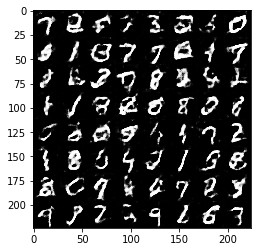

Epoch 2/2... Step 1010... Discriminator Loss: 1.0279... Generator Loss: 1.2114
Epoch 2/2... Step 1020... Discriminator Loss: 0.4770... Generator Loss: 2.4246
Epoch 2/2... Step 1030... Discriminator Loss: 0.5221... Generator Loss: 2.1817
Epoch 2/2... Step 1040... Discriminator Loss: 0.7079... Generator Loss: 1.4155
Epoch 2/2... Step 1050... Discriminator Loss: 0.4724... Generator Loss: 2.5655
Epoch 2/2... Step 1060... Discriminator Loss: 0.6470... Generator Loss: 1.7081
Epoch 2/2... Step 1070... Discriminator Loss: 0.5456... Generator Loss: 2.7070
Epoch 2/2... Step 1080... Discriminator Loss: 0.5673... Generator Loss: 1.9363
Epoch 2/2... Step 1090... Discriminator Loss: 0.4959... Generator Loss: 2.6257
Epoch 2/2... Step 1100... Discriminator Loss: 0.9695... Generator Loss: 0.9552


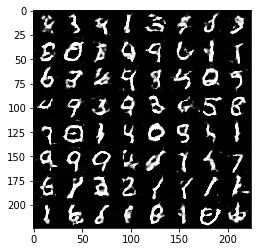

Epoch 2/2... Step 1110... Discriminator Loss: 2.2407... Generator Loss: 0.5743
Epoch 2/2... Step 1120... Discriminator Loss: 0.5971... Generator Loss: 2.2789
Epoch 2/2... Step 1130... Discriminator Loss: 0.5377... Generator Loss: 2.0815
Epoch 2/2... Step 1140... Discriminator Loss: 0.5687... Generator Loss: 1.8578
Epoch 2/2... Step 1150... Discriminator Loss: 0.5121... Generator Loss: 2.2365
Epoch 2/2... Step 1160... Discriminator Loss: 0.5294... Generator Loss: 2.1083
Epoch 2/2... Step 1170... Discriminator Loss: 0.6144... Generator Loss: 1.6833
Epoch 2/2... Step 1180... Discriminator Loss: 1.0890... Generator Loss: 0.8014
Epoch 2/2... Step 1190... Discriminator Loss: 0.5037... Generator Loss: 2.2859
Epoch 2/2... Step 1200... Discriminator Loss: 0.5141... Generator Loss: 2.2167


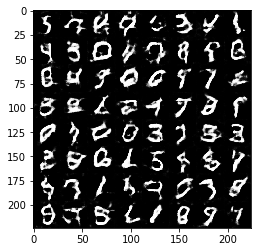

Epoch 2/2... Step 1210... Discriminator Loss: 0.5091... Generator Loss: 2.3860
Epoch 2/2... Step 1220... Discriminator Loss: 0.7507... Generator Loss: 3.3904
Epoch 2/2... Step 1230... Discriminator Loss: 0.7110... Generator Loss: 1.4679
Epoch 2/2... Step 1240... Discriminator Loss: 0.6059... Generator Loss: 1.6705
Epoch 2/2... Step 1250... Discriminator Loss: 1.1415... Generator Loss: 3.7716
Epoch 2/2... Step 1260... Discriminator Loss: 1.2569... Generator Loss: 2.9716
Epoch 2/2... Step 1270... Discriminator Loss: 0.8489... Generator Loss: 1.2334
Epoch 2/2... Step 1280... Discriminator Loss: 0.7477... Generator Loss: 1.4781
Epoch 2/2... Step 1290... Discriminator Loss: 0.6859... Generator Loss: 2.1832
Epoch 2/2... Step 1300... Discriminator Loss: 0.6114... Generator Loss: 1.8046


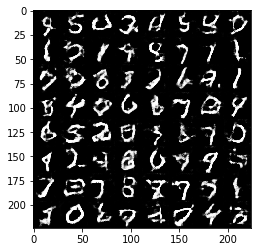

Epoch 2/2... Step 1310... Discriminator Loss: 0.5084... Generator Loss: 2.2549
Epoch 2/2... Step 1320... Discriminator Loss: 0.6804... Generator Loss: 1.6342
Epoch 2/2... Step 1330... Discriminator Loss: 0.7364... Generator Loss: 3.1586
Epoch 2/2... Step 1340... Discriminator Loss: 0.5238... Generator Loss: 2.3949
Epoch 2/2... Step 1350... Discriminator Loss: 0.6790... Generator Loss: 1.4189
Epoch 2/2... Step 1360... Discriminator Loss: 0.5952... Generator Loss: 1.7132
Epoch 2/2... Step 1370... Discriminator Loss: 0.5074... Generator Loss: 2.8035
Epoch 2/2... Step 1380... Discriminator Loss: 0.5165... Generator Loss: 2.3623
Epoch 2/2... Step 1390... Discriminator Loss: 0.8644... Generator Loss: 3.0829
Epoch 2/2... Step 1400... Discriminator Loss: 0.6789... Generator Loss: 1.5089


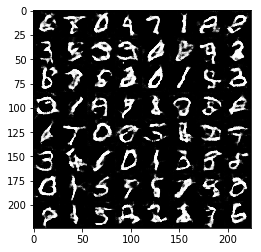

Epoch 2/2... Step 1410... Discriminator Loss: 0.7258... Generator Loss: 3.1209
Epoch 2/2... Step 1420... Discriminator Loss: 0.5527... Generator Loss: 1.9075
Epoch 2/2... Step 1430... Discriminator Loss: 0.6215... Generator Loss: 1.5150
Epoch 2/2... Step 1440... Discriminator Loss: 0.4555... Generator Loss: 2.6747
Epoch 2/2... Step 1450... Discriminator Loss: 0.5836... Generator Loss: 2.5140
Epoch 2/2... Step 1460... Discriminator Loss: 0.5233... Generator Loss: 2.1603
Epoch 2/2... Step 1470... Discriminator Loss: 0.5217... Generator Loss: 2.0188
Epoch 2/2... Step 1480... Discriminator Loss: 0.5601... Generator Loss: 1.8451
Epoch 2/2... Step 1490... Discriminator Loss: 0.5023... Generator Loss: 2.6329
Epoch 2/2... Step 1500... Discriminator Loss: 0.5073... Generator Loss: 2.3275


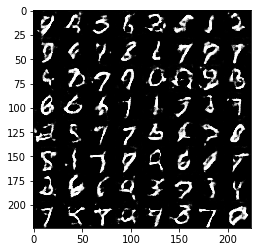

Epoch 2/2... Step 1510... Discriminator Loss: 0.6125... Generator Loss: 1.6705
Epoch 2/2... Step 1520... Discriminator Loss: 0.5379... Generator Loss: 1.8737
Epoch 2/2... Step 1530... Discriminator Loss: 0.4236... Generator Loss: 2.8429
Epoch 2/2... Step 1540... Discriminator Loss: 0.4629... Generator Loss: 2.5035
Epoch 2/2... Step 1550... Discriminator Loss: 0.7008... Generator Loss: 2.2370
Epoch 2/2... Step 1560... Discriminator Loss: 0.6918... Generator Loss: 2.4192
Epoch 2/2... Step 1570... Discriminator Loss: 0.5446... Generator Loss: 2.0142
Epoch 2/2... Step 1580... Discriminator Loss: 0.5497... Generator Loss: 1.9625
Epoch 2/2... Step 1590... Discriminator Loss: 0.6418... Generator Loss: 1.5978
Epoch 2/2... Step 1600... Discriminator Loss: 0.5047... Generator Loss: 2.2558


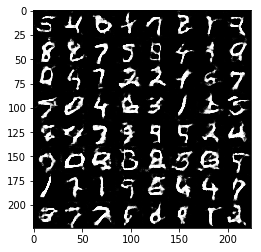

Epoch 2/2... Step 1610... Discriminator Loss: 0.7407... Generator Loss: 1.2868
Epoch 2/2... Step 1620... Discriminator Loss: 0.5571... Generator Loss: 2.7432
Epoch 2/2... Step 1630... Discriminator Loss: 0.6573... Generator Loss: 1.5103
Epoch 2/2... Step 1640... Discriminator Loss: 0.5426... Generator Loss: 2.3093
Epoch 2/2... Step 1650... Discriminator Loss: 0.4694... Generator Loss: 2.3355
Epoch 2/2... Step 1660... Discriminator Loss: 0.5055... Generator Loss: 2.1035
Epoch 2/2... Step 1670... Discriminator Loss: 0.5187... Generator Loss: 2.0735
Epoch 2/2... Step 1680... Discriminator Loss: 2.6637... Generator Loss: 0.2001
Epoch 2/2... Step 1690... Discriminator Loss: 0.6497... Generator Loss: 1.6184
Epoch 2/2... Step 1700... Discriminator Loss: 0.8359... Generator Loss: 1.1115


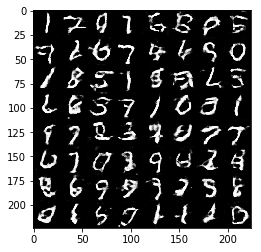

Epoch 2/2... Step 1710... Discriminator Loss: 0.6741... Generator Loss: 1.4428
Epoch 2/2... Step 1720... Discriminator Loss: 0.7457... Generator Loss: 1.4068
Epoch 2/2... Step 1730... Discriminator Loss: 0.8002... Generator Loss: 1.4034
Epoch 2/2... Step 1740... Discriminator Loss: 0.6829... Generator Loss: 1.5934
Epoch 2/2... Step 1750... Discriminator Loss: 0.5114... Generator Loss: 2.2292
Epoch 2/2... Step 1760... Discriminator Loss: 0.5030... Generator Loss: 2.1936
Epoch 2/2... Step 1770... Discriminator Loss: 0.6037... Generator Loss: 1.7308
Epoch 2/2... Step 1780... Discriminator Loss: 0.4900... Generator Loss: 2.4908
Epoch 2/2... Step 1790... Discriminator Loss: 0.4159... Generator Loss: 2.9429
Epoch 2/2... Step 1800... Discriminator Loss: 0.8282... Generator Loss: 1.2671


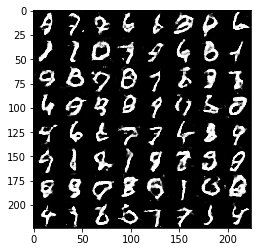

Epoch 2/2... Step 1810... Discriminator Loss: 0.8841... Generator Loss: 2.3672
Epoch 2/2... Step 1820... Discriminator Loss: 0.9744... Generator Loss: 0.8929
Epoch 2/2... Step 1830... Discriminator Loss: 0.8495... Generator Loss: 1.1235
Epoch 2/2... Step 1840... Discriminator Loss: 0.5825... Generator Loss: 1.8845
Epoch 2/2... Step 1850... Discriminator Loss: 0.5693... Generator Loss: 2.8350
Epoch 2/2... Step 1860... Discriminator Loss: 0.5989... Generator Loss: 1.6877
Epoch 2/2... Step 1870... Discriminator Loss: 0.6238... Generator Loss: 1.5909


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.00025
beta1 = 0.45


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Step 10... Discriminator Loss: 0.5074... Generator Loss: 2.2236
Epoch 1/1... Step 20... Discriminator Loss: 0.7264... Generator Loss: 1.5653
Epoch 1/1... Step 30... Discriminator Loss: 0.4186... Generator Loss: 2.8907
Epoch 1/1... Step 40... Discriminator Loss: 0.3846... Generator Loss: 3.4663
Epoch 1/1... Step 50... Discriminator Loss: 0.5371... Generator Loss: 4.7053
Epoch 1/1... Step 60... Discriminator Loss: 0.5227... Generator Loss: 2.7065
Epoch 1/1... Step 70... Discriminator Loss: 0.9313... Generator Loss: 1.0116
Epoch 1/1... Step 80... Discriminator Loss: 0.6019... Generator Loss: 2.1274
Epoch 1/1... Step 90... Discriminator Loss: 0.6857... Generator Loss: 1.6785
Epoch 1/1... Step 100... Discriminator Loss: 1.2603... Generator Loss: 0.6151


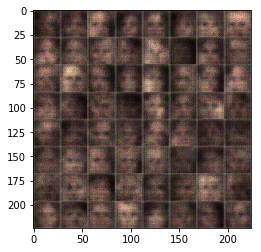

Epoch 1/1... Step 110... Discriminator Loss: 0.8895... Generator Loss: 1.0616
Epoch 1/1... Step 120... Discriminator Loss: 0.5692... Generator Loss: 2.5243
Epoch 1/1... Step 130... Discriminator Loss: 0.5273... Generator Loss: 2.2642
Epoch 1/1... Step 140... Discriminator Loss: 1.4313... Generator Loss: 0.5760
Epoch 1/1... Step 150... Discriminator Loss: 0.5948... Generator Loss: 1.8262
Epoch 1/1... Step 160... Discriminator Loss: 0.8210... Generator Loss: 1.3412
Epoch 1/1... Step 170... Discriminator Loss: 1.0732... Generator Loss: 4.9653
Epoch 1/1... Step 180... Discriminator Loss: 0.6810... Generator Loss: 1.5266
Epoch 1/1... Step 190... Discriminator Loss: 0.7171... Generator Loss: 1.4836
Epoch 1/1... Step 200... Discriminator Loss: 0.6475... Generator Loss: 2.6464


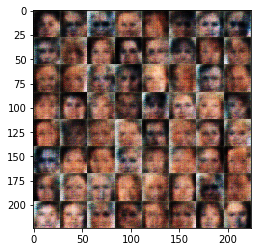

Epoch 1/1... Step 210... Discriminator Loss: 0.5977... Generator Loss: 2.1393
Epoch 1/1... Step 220... Discriminator Loss: 0.5408... Generator Loss: 2.5445
Epoch 1/1... Step 230... Discriminator Loss: 0.6093... Generator Loss: 2.8062
Epoch 1/1... Step 240... Discriminator Loss: 0.9251... Generator Loss: 0.9454
Epoch 1/1... Step 250... Discriminator Loss: 0.7630... Generator Loss: 1.3422
Epoch 1/1... Step 260... Discriminator Loss: 0.5660... Generator Loss: 2.3664
Epoch 1/1... Step 270... Discriminator Loss: 0.6129... Generator Loss: 2.0463
Epoch 1/1... Step 280... Discriminator Loss: 0.7528... Generator Loss: 1.2993
Epoch 1/1... Step 290... Discriminator Loss: 1.2073... Generator Loss: 0.6745
Epoch 1/1... Step 300... Discriminator Loss: 0.6106... Generator Loss: 1.7420


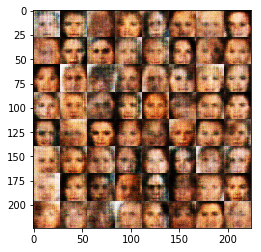

Epoch 1/1... Step 310... Discriminator Loss: 0.8310... Generator Loss: 3.1965
Epoch 1/1... Step 320... Discriminator Loss: 0.8435... Generator Loss: 1.5507
Epoch 1/1... Step 330... Discriminator Loss: 0.7594... Generator Loss: 2.1454
Epoch 1/1... Step 340... Discriminator Loss: 0.7021... Generator Loss: 1.4048
Epoch 1/1... Step 350... Discriminator Loss: 0.5834... Generator Loss: 2.0833
Epoch 1/1... Step 360... Discriminator Loss: 0.7439... Generator Loss: 1.4476
Epoch 1/1... Step 370... Discriminator Loss: 0.6142... Generator Loss: 2.0594
Epoch 1/1... Step 380... Discriminator Loss: 0.8453... Generator Loss: 1.1637
Epoch 1/1... Step 390... Discriminator Loss: 0.8720... Generator Loss: 1.0820
Epoch 1/1... Step 400... Discriminator Loss: 1.2725... Generator Loss: 3.6624


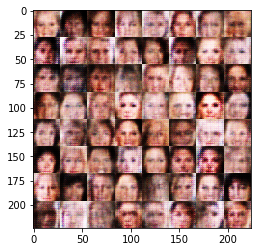

Epoch 1/1... Step 410... Discriminator Loss: 0.8136... Generator Loss: 2.0947
Epoch 1/1... Step 420... Discriminator Loss: 0.7460... Generator Loss: 1.3980
Epoch 1/1... Step 430... Discriminator Loss: 1.3242... Generator Loss: 0.5674
Epoch 1/1... Step 440... Discriminator Loss: 0.8127... Generator Loss: 1.3030
Epoch 1/1... Step 450... Discriminator Loss: 0.6568... Generator Loss: 1.9266
Epoch 1/1... Step 460... Discriminator Loss: 1.7642... Generator Loss: 0.3599
Epoch 1/1... Step 470... Discriminator Loss: 0.7842... Generator Loss: 1.6488
Epoch 1/1... Step 480... Discriminator Loss: 0.9217... Generator Loss: 0.9539
Epoch 1/1... Step 490... Discriminator Loss: 0.7012... Generator Loss: 1.5329
Epoch 1/1... Step 500... Discriminator Loss: 1.3598... Generator Loss: 2.9049


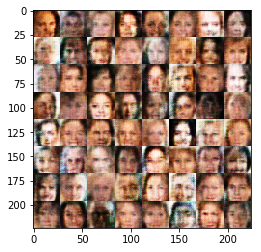

Epoch 1/1... Step 510... Discriminator Loss: 0.9547... Generator Loss: 0.9400
Epoch 1/1... Step 520... Discriminator Loss: 0.7577... Generator Loss: 1.4040
Epoch 1/1... Step 530... Discriminator Loss: 0.9586... Generator Loss: 0.8992
Epoch 1/1... Step 540... Discriminator Loss: 0.7448... Generator Loss: 1.6529
Epoch 1/1... Step 550... Discriminator Loss: 0.8185... Generator Loss: 1.8234
Epoch 1/1... Step 560... Discriminator Loss: 0.7488... Generator Loss: 1.5854
Epoch 1/1... Step 570... Discriminator Loss: 0.7395... Generator Loss: 1.5266
Epoch 1/1... Step 580... Discriminator Loss: 0.8660... Generator Loss: 1.0122
Epoch 1/1... Step 590... Discriminator Loss: 0.8271... Generator Loss: 2.6364
Epoch 1/1... Step 600... Discriminator Loss: 0.9345... Generator Loss: 2.6744


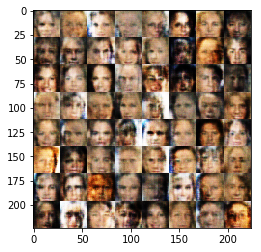

Epoch 1/1... Step 610... Discriminator Loss: 0.7512... Generator Loss: 1.4066
Epoch 1/1... Step 620... Discriminator Loss: 0.8138... Generator Loss: 1.4281
Epoch 1/1... Step 630... Discriminator Loss: 0.8196... Generator Loss: 1.6285
Epoch 1/1... Step 640... Discriminator Loss: 1.1413... Generator Loss: 0.7314
Epoch 1/1... Step 650... Discriminator Loss: 0.7954... Generator Loss: 1.3512
Epoch 1/1... Step 660... Discriminator Loss: 0.8995... Generator Loss: 0.9966
Epoch 1/1... Step 670... Discriminator Loss: 0.8513... Generator Loss: 1.6301
Epoch 1/1... Step 680... Discriminator Loss: 1.1500... Generator Loss: 0.6971
Epoch 1/1... Step 690... Discriminator Loss: 1.0491... Generator Loss: 0.7898
Epoch 1/1... Step 700... Discriminator Loss: 0.7487... Generator Loss: 1.9706


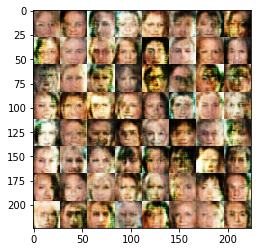

Epoch 1/1... Step 710... Discriminator Loss: 0.9968... Generator Loss: 2.7807
Epoch 1/1... Step 720... Discriminator Loss: 0.8901... Generator Loss: 2.0536
Epoch 1/1... Step 730... Discriminator Loss: 0.7007... Generator Loss: 1.8792
Epoch 1/1... Step 740... Discriminator Loss: 0.7073... Generator Loss: 2.0142
Epoch 1/1... Step 750... Discriminator Loss: 0.6537... Generator Loss: 1.5342
Epoch 1/1... Step 760... Discriminator Loss: 0.9536... Generator Loss: 2.0521
Epoch 1/1... Step 770... Discriminator Loss: 0.7938... Generator Loss: 1.1845
Epoch 1/1... Step 780... Discriminator Loss: 0.8360... Generator Loss: 1.1705
Epoch 1/1... Step 790... Discriminator Loss: 0.9362... Generator Loss: 0.9708
Epoch 1/1... Step 800... Discriminator Loss: 1.0178... Generator Loss: 0.8262


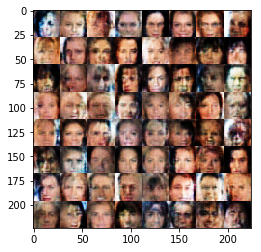

Epoch 1/1... Step 810... Discriminator Loss: 0.9536... Generator Loss: 0.8856
Epoch 1/1... Step 820... Discriminator Loss: 1.1589... Generator Loss: 0.6652
Epoch 1/1... Step 830... Discriminator Loss: 1.1219... Generator Loss: 0.6913
Epoch 1/1... Step 840... Discriminator Loss: 0.8328... Generator Loss: 1.0750
Epoch 1/1... Step 850... Discriminator Loss: 0.7818... Generator Loss: 1.4779
Epoch 1/1... Step 860... Discriminator Loss: 1.0547... Generator Loss: 0.7640
Epoch 1/1... Step 870... Discriminator Loss: 0.8728... Generator Loss: 2.5994
Epoch 1/1... Step 880... Discriminator Loss: 0.8195... Generator Loss: 1.1251
Epoch 1/1... Step 890... Discriminator Loss: 0.9251... Generator Loss: 1.0150
Epoch 1/1... Step 900... Discriminator Loss: 0.8720... Generator Loss: 1.0360


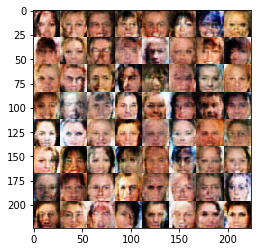

Epoch 1/1... Step 910... Discriminator Loss: 1.1312... Generator Loss: 0.6882
Epoch 1/1... Step 920... Discriminator Loss: 0.9152... Generator Loss: 0.9482
Epoch 1/1... Step 930... Discriminator Loss: 0.8673... Generator Loss: 0.9958
Epoch 1/1... Step 940... Discriminator Loss: 0.6577... Generator Loss: 1.8796
Epoch 1/1... Step 950... Discriminator Loss: 0.7003... Generator Loss: 1.3874
Epoch 1/1... Step 960... Discriminator Loss: 0.7933... Generator Loss: 1.1780
Epoch 1/1... Step 970... Discriminator Loss: 0.7741... Generator Loss: 1.1996
Epoch 1/1... Step 980... Discriminator Loss: 0.9903... Generator Loss: 0.8495
Epoch 1/1... Step 990... Discriminator Loss: 0.6769... Generator Loss: 1.6957
Epoch 1/1... Step 1000... Discriminator Loss: 0.6984... Generator Loss: 1.4394


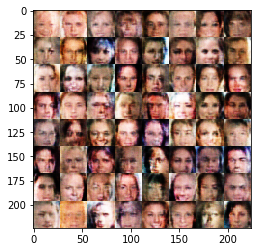

Epoch 1/1... Step 1010... Discriminator Loss: 0.7077... Generator Loss: 2.5391
Epoch 1/1... Step 1020... Discriminator Loss: 0.9042... Generator Loss: 1.0073
Epoch 1/1... Step 1030... Discriminator Loss: 1.5094... Generator Loss: 0.4361
Epoch 1/1... Step 1040... Discriminator Loss: 0.8435... Generator Loss: 1.4868
Epoch 1/1... Step 1050... Discriminator Loss: 0.6876... Generator Loss: 1.4588
Epoch 1/1... Step 1060... Discriminator Loss: 0.7119... Generator Loss: 1.6603
Epoch 1/1... Step 1070... Discriminator Loss: 0.8182... Generator Loss: 2.3047
Epoch 1/1... Step 1080... Discriminator Loss: 1.1536... Generator Loss: 0.6761
Epoch 1/1... Step 1090... Discriminator Loss: 1.0104... Generator Loss: 0.8198
Epoch 1/1... Step 1100... Discriminator Loss: 0.8019... Generator Loss: 1.1296


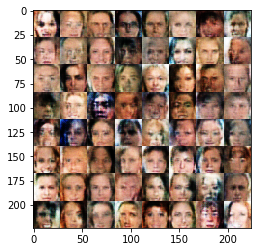

Epoch 1/1... Step 1110... Discriminator Loss: 1.1469... Generator Loss: 2.2296
Epoch 1/1... Step 1120... Discriminator Loss: 0.6114... Generator Loss: 1.9712
Epoch 1/1... Step 1130... Discriminator Loss: 1.0484... Generator Loss: 0.8148
Epoch 1/1... Step 1140... Discriminator Loss: 0.7213... Generator Loss: 1.4816
Epoch 1/1... Step 1150... Discriminator Loss: 0.7563... Generator Loss: 1.3193
Epoch 1/1... Step 1160... Discriminator Loss: 0.7965... Generator Loss: 1.2307
Epoch 1/1... Step 1170... Discriminator Loss: 0.7951... Generator Loss: 1.1341
Epoch 1/1... Step 1180... Discriminator Loss: 0.9107... Generator Loss: 0.9687
Epoch 1/1... Step 1190... Discriminator Loss: 0.8698... Generator Loss: 2.3239
Epoch 1/1... Step 1200... Discriminator Loss: 0.7338... Generator Loss: 2.3448


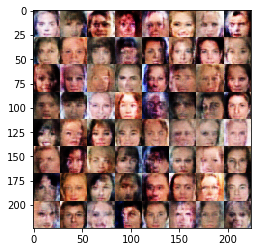

Epoch 1/1... Step 1210... Discriminator Loss: 0.8474... Generator Loss: 1.0151
Epoch 1/1... Step 1220... Discriminator Loss: 0.6854... Generator Loss: 1.3659
Epoch 1/1... Step 1230... Discriminator Loss: 0.8600... Generator Loss: 2.4659
Epoch 1/1... Step 1240... Discriminator Loss: 0.7497... Generator Loss: 1.3040
Epoch 1/1... Step 1250... Discriminator Loss: 0.9745... Generator Loss: 0.9144
Epoch 1/1... Step 1260... Discriminator Loss: 0.7393... Generator Loss: 1.9926
Epoch 1/1... Step 1270... Discriminator Loss: 0.7341... Generator Loss: 1.3722
Epoch 1/1... Step 1280... Discriminator Loss: 1.2645... Generator Loss: 0.6662
Epoch 1/1... Step 1290... Discriminator Loss: 0.5598... Generator Loss: 1.9543
Epoch 1/1... Step 1300... Discriminator Loss: 1.0129... Generator Loss: 0.8560


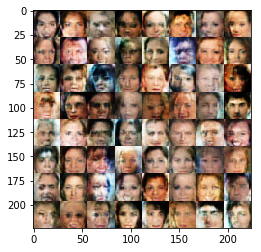

Epoch 1/1... Step 1310... Discriminator Loss: 0.8400... Generator Loss: 1.1771
Epoch 1/1... Step 1320... Discriminator Loss: 1.0673... Generator Loss: 0.7807
Epoch 1/1... Step 1330... Discriminator Loss: 0.6367... Generator Loss: 1.7584
Epoch 1/1... Step 1340... Discriminator Loss: 0.8063... Generator Loss: 2.8754
Epoch 1/1... Step 1350... Discriminator Loss: 0.7917... Generator Loss: 1.1345
Epoch 1/1... Step 1360... Discriminator Loss: 0.7276... Generator Loss: 2.3524
Epoch 1/1... Step 1370... Discriminator Loss: 0.9190... Generator Loss: 0.9142
Epoch 1/1... Step 1380... Discriminator Loss: 0.7268... Generator Loss: 1.5281
Epoch 1/1... Step 1390... Discriminator Loss: 0.6710... Generator Loss: 1.6508
Epoch 1/1... Step 1400... Discriminator Loss: 0.6582... Generator Loss: 1.4741


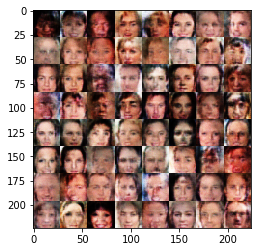

Epoch 1/1... Step 1410... Discriminator Loss: 1.0649... Generator Loss: 0.7814
Epoch 1/1... Step 1420... Discriminator Loss: 0.6903... Generator Loss: 1.5489
Epoch 1/1... Step 1430... Discriminator Loss: 0.8922... Generator Loss: 1.0743
Epoch 1/1... Step 1440... Discriminator Loss: 0.9484... Generator Loss: 0.8720
Epoch 1/1... Step 1450... Discriminator Loss: 0.9040... Generator Loss: 0.9946
Epoch 1/1... Step 1460... Discriminator Loss: 1.0104... Generator Loss: 2.9594
Epoch 1/1... Step 1470... Discriminator Loss: 1.3386... Generator Loss: 3.1367
Epoch 1/1... Step 1480... Discriminator Loss: 1.4187... Generator Loss: 0.4999
Epoch 1/1... Step 1490... Discriminator Loss: 0.6388... Generator Loss: 1.5651
Epoch 1/1... Step 1500... Discriminator Loss: 0.9058... Generator Loss: 1.0019


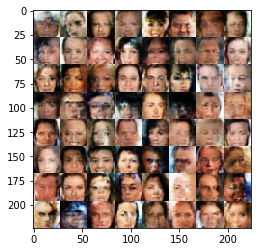

Epoch 1/1... Step 1510... Discriminator Loss: 0.8394... Generator Loss: 1.0652
Epoch 1/1... Step 1520... Discriminator Loss: 0.6537... Generator Loss: 1.8591
Epoch 1/1... Step 1530... Discriminator Loss: 0.7018... Generator Loss: 1.3076
Epoch 1/1... Step 1540... Discriminator Loss: 0.5938... Generator Loss: 1.6979
Epoch 1/1... Step 1550... Discriminator Loss: 0.7068... Generator Loss: 1.9035
Epoch 1/1... Step 1560... Discriminator Loss: 0.6940... Generator Loss: 2.2393
Epoch 1/1... Step 1570... Discriminator Loss: 1.0681... Generator Loss: 2.9768
Epoch 1/1... Step 1580... Discriminator Loss: 1.0689... Generator Loss: 0.7846
Epoch 1/1... Step 1590... Discriminator Loss: 0.7176... Generator Loss: 2.7294
Epoch 1/1... Step 1600... Discriminator Loss: 0.8347... Generator Loss: 2.1994


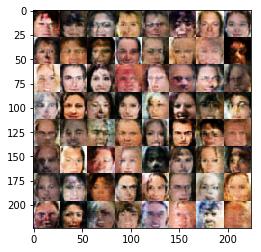

Epoch 1/1... Step 1610... Discriminator Loss: 0.7347... Generator Loss: 1.5081
Epoch 1/1... Step 1620... Discriminator Loss: 0.7422... Generator Loss: 1.3029
Epoch 1/1... Step 1630... Discriminator Loss: 1.2089... Generator Loss: 2.1413
Epoch 1/1... Step 1640... Discriminator Loss: 0.9458... Generator Loss: 0.9072
Epoch 1/1... Step 1650... Discriminator Loss: 0.6674... Generator Loss: 1.6828
Epoch 1/1... Step 1660... Discriminator Loss: 0.7727... Generator Loss: 1.2112
Epoch 1/1... Step 1670... Discriminator Loss: 1.0814... Generator Loss: 0.7524
Epoch 1/1... Step 1680... Discriminator Loss: 0.7284... Generator Loss: 1.4556
Epoch 1/1... Step 1690... Discriminator Loss: 0.8032... Generator Loss: 1.5851
Epoch 1/1... Step 1700... Discriminator Loss: 0.8956... Generator Loss: 0.9724


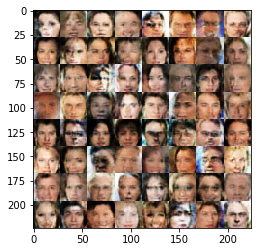

Epoch 1/1... Step 1710... Discriminator Loss: 0.6258... Generator Loss: 1.6792
Epoch 1/1... Step 1720... Discriminator Loss: 0.6183... Generator Loss: 2.2088
Epoch 1/1... Step 1730... Discriminator Loss: 1.2260... Generator Loss: 2.7864
Epoch 1/1... Step 1740... Discriminator Loss: 1.3165... Generator Loss: 0.5402
Epoch 1/1... Step 1750... Discriminator Loss: 0.7637... Generator Loss: 1.4751
Epoch 1/1... Step 1760... Discriminator Loss: 0.6827... Generator Loss: 1.8823
Epoch 1/1... Step 1770... Discriminator Loss: 0.6051... Generator Loss: 1.7808
Epoch 1/1... Step 1780... Discriminator Loss: 0.6770... Generator Loss: 1.4300
Epoch 1/1... Step 1790... Discriminator Loss: 0.7538... Generator Loss: 1.3135
Epoch 1/1... Step 1800... Discriminator Loss: 0.8017... Generator Loss: 1.1624


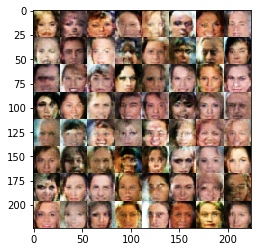

Epoch 1/1... Step 1810... Discriminator Loss: 0.8968... Generator Loss: 2.1901
Epoch 1/1... Step 1820... Discriminator Loss: 0.9303... Generator Loss: 1.3123
Epoch 1/1... Step 1830... Discriminator Loss: 0.7241... Generator Loss: 1.3597
Epoch 1/1... Step 1840... Discriminator Loss: 1.1191... Generator Loss: 0.7241
Epoch 1/1... Step 1850... Discriminator Loss: 1.1429... Generator Loss: 0.6965
Epoch 1/1... Step 1860... Discriminator Loss: 0.8721... Generator Loss: 0.9951
Epoch 1/1... Step 1870... Discriminator Loss: 0.9205... Generator Loss: 0.9737
Epoch 1/1... Step 1880... Discriminator Loss: 0.8503... Generator Loss: 1.0755
Epoch 1/1... Step 1890... Discriminator Loss: 0.5329... Generator Loss: 2.3924
Epoch 1/1... Step 1900... Discriminator Loss: 0.9415... Generator Loss: 0.9087


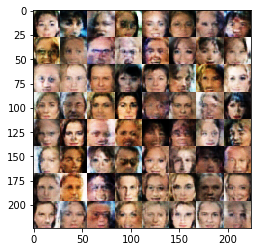

Epoch 1/1... Step 1910... Discriminator Loss: 1.1541... Generator Loss: 1.3276
Epoch 1/1... Step 1920... Discriminator Loss: 1.2735... Generator Loss: 0.5826
Epoch 1/1... Step 1930... Discriminator Loss: 0.8646... Generator Loss: 1.1018
Epoch 1/1... Step 1940... Discriminator Loss: 0.6385... Generator Loss: 1.6958
Epoch 1/1... Step 1950... Discriminator Loss: 0.7716... Generator Loss: 1.3760
Epoch 1/1... Step 1960... Discriminator Loss: 0.7937... Generator Loss: 1.4040
Epoch 1/1... Step 1970... Discriminator Loss: 1.0842... Generator Loss: 0.7625
Epoch 1/1... Step 1980... Discriminator Loss: 1.1733... Generator Loss: 0.6606
Epoch 1/1... Step 1990... Discriminator Loss: 0.8943... Generator Loss: 0.9877
Epoch 1/1... Step 2000... Discriminator Loss: 0.9114... Generator Loss: 0.9996


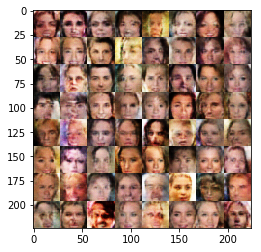

Epoch 1/1... Step 2010... Discriminator Loss: 0.7584... Generator Loss: 1.2080
Epoch 1/1... Step 2020... Discriminator Loss: 0.8032... Generator Loss: 1.1827
Epoch 1/1... Step 2030... Discriminator Loss: 0.6722... Generator Loss: 1.6708
Epoch 1/1... Step 2040... Discriminator Loss: 0.8036... Generator Loss: 1.1630
Epoch 1/1... Step 2050... Discriminator Loss: 0.5722... Generator Loss: 1.8207
Epoch 1/1... Step 2060... Discriminator Loss: 0.9563... Generator Loss: 1.0037
Epoch 1/1... Step 2070... Discriminator Loss: 0.9363... Generator Loss: 1.0351
Epoch 1/1... Step 2080... Discriminator Loss: 0.8902... Generator Loss: 0.9602
Epoch 1/1... Step 2090... Discriminator Loss: 1.5386... Generator Loss: 0.4684
Epoch 1/1... Step 2100... Discriminator Loss: 0.7859... Generator Loss: 1.3285


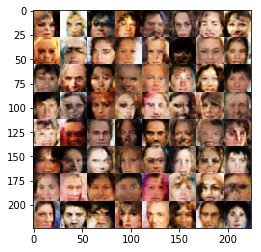

Epoch 1/1... Step 2110... Discriminator Loss: 0.7006... Generator Loss: 1.6822
Epoch 1/1... Step 2120... Discriminator Loss: 0.6929... Generator Loss: 1.3747
Epoch 1/1... Step 2130... Discriminator Loss: 0.6603... Generator Loss: 1.5667
Epoch 1/1... Step 2140... Discriminator Loss: 0.6693... Generator Loss: 2.0099
Epoch 1/1... Step 2150... Discriminator Loss: 0.8635... Generator Loss: 1.0249
Epoch 1/1... Step 2160... Discriminator Loss: 0.7402... Generator Loss: 1.6773
Epoch 1/1... Step 2170... Discriminator Loss: 0.6410... Generator Loss: 1.7418
Epoch 1/1... Step 2180... Discriminator Loss: 0.8075... Generator Loss: 1.8285
Epoch 1/1... Step 2190... Discriminator Loss: 0.9830... Generator Loss: 0.8524
Epoch 1/1... Step 2200... Discriminator Loss: 0.6279... Generator Loss: 2.0497


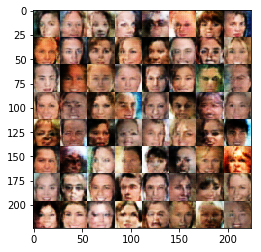

Epoch 1/1... Step 2210... Discriminator Loss: 0.8692... Generator Loss: 1.0133
Epoch 1/1... Step 2220... Discriminator Loss: 0.7536... Generator Loss: 1.2920
Epoch 1/1... Step 2230... Discriminator Loss: 0.6535... Generator Loss: 1.8348
Epoch 1/1... Step 2240... Discriminator Loss: 0.8974... Generator Loss: 2.5621
Epoch 1/1... Step 2250... Discriminator Loss: 0.8539... Generator Loss: 2.1124
Epoch 1/1... Step 2260... Discriminator Loss: 0.8803... Generator Loss: 1.1304
Epoch 1/1... Step 2270... Discriminator Loss: 0.6774... Generator Loss: 1.4654
Epoch 1/1... Step 2280... Discriminator Loss: 0.8692... Generator Loss: 2.2083
Epoch 1/1... Step 2290... Discriminator Loss: 0.7048... Generator Loss: 1.3699
Epoch 1/1... Step 2300... Discriminator Loss: 0.4884... Generator Loss: 2.5848


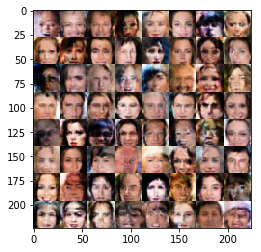

Epoch 1/1... Step 2310... Discriminator Loss: 0.7307... Generator Loss: 1.4828
Epoch 1/1... Step 2320... Discriminator Loss: 0.8726... Generator Loss: 0.9937
Epoch 1/1... Step 2330... Discriminator Loss: 0.6871... Generator Loss: 1.6696
Epoch 1/1... Step 2340... Discriminator Loss: 0.8347... Generator Loss: 1.1315
Epoch 1/1... Step 2350... Discriminator Loss: 0.6723... Generator Loss: 1.4440
Epoch 1/1... Step 2360... Discriminator Loss: 0.5073... Generator Loss: 2.3123
Epoch 1/1... Step 2370... Discriminator Loss: 0.7406... Generator Loss: 1.3294
Epoch 1/1... Step 2380... Discriminator Loss: 0.6299... Generator Loss: 2.1675
Epoch 1/1... Step 2390... Discriminator Loss: 1.5211... Generator Loss: 1.7645
Epoch 1/1... Step 2400... Discriminator Loss: 0.5538... Generator Loss: 1.9008


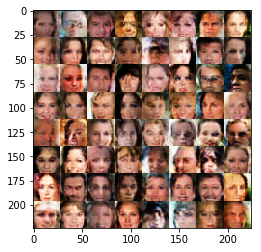

Epoch 1/1... Step 2410... Discriminator Loss: 0.6139... Generator Loss: 1.7802
Epoch 1/1... Step 2420... Discriminator Loss: 0.8012... Generator Loss: 1.1335
Epoch 1/1... Step 2430... Discriminator Loss: 0.5888... Generator Loss: 2.1769
Epoch 1/1... Step 2440... Discriminator Loss: 0.6167... Generator Loss: 1.8875
Epoch 1/1... Step 2450... Discriminator Loss: 0.6780... Generator Loss: 1.6602
Epoch 1/1... Step 2460... Discriminator Loss: 1.7578... Generator Loss: 0.3287
Epoch 1/1... Step 2470... Discriminator Loss: 0.8061... Generator Loss: 1.2351
Epoch 1/1... Step 2480... Discriminator Loss: 0.6246... Generator Loss: 1.7254
Epoch 1/1... Step 2490... Discriminator Loss: 0.7592... Generator Loss: 1.4562
Epoch 1/1... Step 2500... Discriminator Loss: 0.7987... Generator Loss: 1.1638


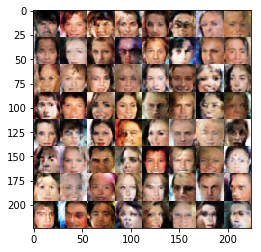

Epoch 1/1... Step 2510... Discriminator Loss: 0.6694... Generator Loss: 1.5157
Epoch 1/1... Step 2520... Discriminator Loss: 1.0541... Generator Loss: 0.7681
Epoch 1/1... Step 2530... Discriminator Loss: 0.6208... Generator Loss: 1.8526
Epoch 1/1... Step 2540... Discriminator Loss: 0.7223... Generator Loss: 1.3366
Epoch 1/1... Step 2550... Discriminator Loss: 0.7625... Generator Loss: 1.4044
Epoch 1/1... Step 2560... Discriminator Loss: 0.6853... Generator Loss: 1.6997
Epoch 1/1... Step 2570... Discriminator Loss: 0.9193... Generator Loss: 0.9461
Epoch 1/1... Step 2580... Discriminator Loss: 0.9068... Generator Loss: 1.0276
Epoch 1/1... Step 2590... Discriminator Loss: 0.5449... Generator Loss: 2.0997
Epoch 1/1... Step 2600... Discriminator Loss: 1.1673... Generator Loss: 0.7239


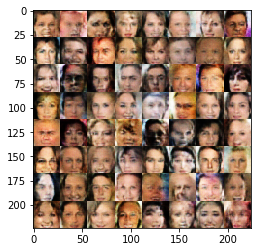

Epoch 1/1... Step 2610... Discriminator Loss: 0.8876... Generator Loss: 1.1258
Epoch 1/1... Step 2620... Discriminator Loss: 0.7226... Generator Loss: 1.8619
Epoch 1/1... Step 2630... Discriminator Loss: 0.6377... Generator Loss: 1.6680
Epoch 1/1... Step 2640... Discriminator Loss: 1.0719... Generator Loss: 0.7790
Epoch 1/1... Step 2650... Discriminator Loss: 0.7501... Generator Loss: 1.3055
Epoch 1/1... Step 2660... Discriminator Loss: 0.5736... Generator Loss: 2.3870
Epoch 1/1... Step 2670... Discriminator Loss: 0.7249... Generator Loss: 1.3443
Epoch 1/1... Step 2680... Discriminator Loss: 0.9668... Generator Loss: 0.9192
Epoch 1/1... Step 2690... Discriminator Loss: 1.0098... Generator Loss: 0.8676
Epoch 1/1... Step 2700... Discriminator Loss: 0.6953... Generator Loss: 1.3923


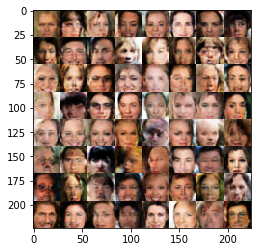

Epoch 1/1... Step 2710... Discriminator Loss: 0.6914... Generator Loss: 1.4634
Epoch 1/1... Step 2720... Discriminator Loss: 1.3763... Generator Loss: 0.5155
Epoch 1/1... Step 2730... Discriminator Loss: 0.9135... Generator Loss: 0.9387
Epoch 1/1... Step 2740... Discriminator Loss: 0.5435... Generator Loss: 2.0020
Epoch 1/1... Step 2750... Discriminator Loss: 1.0718... Generator Loss: 0.7963
Epoch 1/1... Step 2760... Discriminator Loss: 0.6579... Generator Loss: 1.5477
Epoch 1/1... Step 2770... Discriminator Loss: 0.6233... Generator Loss: 1.9765
Epoch 1/1... Step 2780... Discriminator Loss: 0.9116... Generator Loss: 0.9731
Epoch 1/1... Step 2790... Discriminator Loss: 0.7550... Generator Loss: 1.2911
Epoch 1/1... Step 2800... Discriminator Loss: 0.5321... Generator Loss: 2.2758


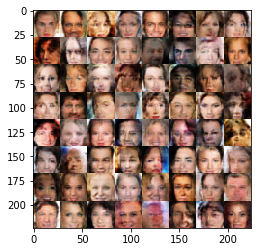

Epoch 1/1... Step 2810... Discriminator Loss: 0.8841... Generator Loss: 1.3196
Epoch 1/1... Step 2820... Discriminator Loss: 0.6203... Generator Loss: 1.9602
Epoch 1/1... Step 2830... Discriminator Loss: 0.6784... Generator Loss: 1.4341
Epoch 1/1... Step 2840... Discriminator Loss: 0.9170... Generator Loss: 0.9386
Epoch 1/1... Step 2850... Discriminator Loss: 0.6189... Generator Loss: 1.5742
Epoch 1/1... Step 2860... Discriminator Loss: 0.6213... Generator Loss: 1.6877
Epoch 1/1... Step 2870... Discriminator Loss: 0.9488... Generator Loss: 0.9823
Epoch 1/1... Step 2880... Discriminator Loss: 0.8763... Generator Loss: 1.0717
Epoch 1/1... Step 2890... Discriminator Loss: 0.9196... Generator Loss: 0.9278
Epoch 1/1... Step 2900... Discriminator Loss: 0.6807... Generator Loss: 1.4911


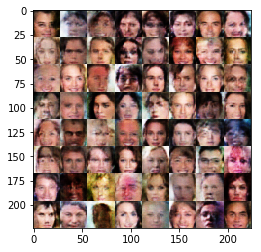

Epoch 1/1... Step 2910... Discriminator Loss: 1.0442... Generator Loss: 0.7499
Epoch 1/1... Step 2920... Discriminator Loss: 0.9406... Generator Loss: 3.1418
Epoch 1/1... Step 2930... Discriminator Loss: 0.6577... Generator Loss: 1.4536
Epoch 1/1... Step 2940... Discriminator Loss: 1.0118... Generator Loss: 0.8657
Epoch 1/1... Step 2950... Discriminator Loss: 0.6294... Generator Loss: 1.8772
Epoch 1/1... Step 2960... Discriminator Loss: 0.6109... Generator Loss: 1.8105
Epoch 1/1... Step 2970... Discriminator Loss: 0.5524... Generator Loss: 2.0772
Epoch 1/1... Step 2980... Discriminator Loss: 0.9742... Generator Loss: 0.9422
Epoch 1/1... Step 2990... Discriminator Loss: 1.4489... Generator Loss: 2.6941
Epoch 1/1... Step 3000... Discriminator Loss: 1.0142... Generator Loss: 0.9715


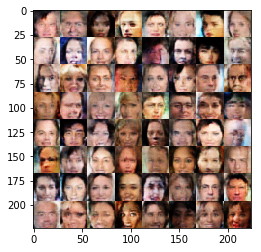

Epoch 1/1... Step 3010... Discriminator Loss: 0.7683... Generator Loss: 2.5078
Epoch 1/1... Step 3020... Discriminator Loss: 0.6874... Generator Loss: 1.4535
Epoch 1/1... Step 3030... Discriminator Loss: 0.6958... Generator Loss: 1.7840
Epoch 1/1... Step 3040... Discriminator Loss: 0.7824... Generator Loss: 1.4663
Epoch 1/1... Step 3050... Discriminator Loss: 0.5940... Generator Loss: 1.7110
Epoch 1/1... Step 3060... Discriminator Loss: 0.9208... Generator Loss: 0.9547
Epoch 1/1... Step 3070... Discriminator Loss: 0.8478... Generator Loss: 1.1524
Epoch 1/1... Step 3080... Discriminator Loss: 0.6644... Generator Loss: 2.6638
Epoch 1/1... Step 3090... Discriminator Loss: 0.6125... Generator Loss: 1.8927
Epoch 1/1... Step 3100... Discriminator Loss: 0.9919... Generator Loss: 0.8990


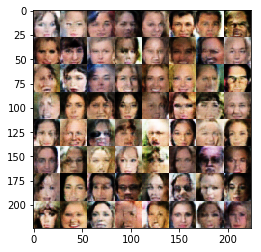

Epoch 1/1... Step 3110... Discriminator Loss: 0.7508... Generator Loss: 1.3128
Epoch 1/1... Step 3120... Discriminator Loss: 0.5660... Generator Loss: 2.0173
Epoch 1/1... Step 3130... Discriminator Loss: 0.6217... Generator Loss: 1.7892
Epoch 1/1... Step 3140... Discriminator Loss: 0.6716... Generator Loss: 1.6138
Epoch 1/1... Step 3150... Discriminator Loss: 0.8897... Generator Loss: 0.9631
Epoch 1/1... Step 3160... Discriminator Loss: 1.4019... Generator Loss: 0.5676


In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.00025
beta1 = 0.45

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.